In [11]:
pip install graphviz

In [12]:
import math

import pandas as pd
import numpy as np
import graphviz
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import ks_2samp
import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy

%matplotlib inline

In [13]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [15]:
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies

,Unnamed: 0,id_cliente,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,data_ref_2015-02-01,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,0,15056,False,True,0,26,6.602740,1.0,8060.34,False,...,False,False,True,False,False,True,False,False,False,False
1,1,9968,True,True,0,28,7.183562,2.0,1852.15,False,...,False,False,False,False,False,True,False,False,False,False
2,2,4312,True,True,0,35,0.838356,2.0,2253.89,False,...,False,False,False,False,False,True,False,False,False,False
3,3,10639,False,True,1,30,4.846575,3.0,6600.77,False,...,False,False,False,False,False,True,False,False,False,False
4,4,7064,True,False,0,33,4.293151,1.0,6475.97,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,16006,False,True,0,48,13.887671,1.0,7990.58,False,...,False,False,True,False,False,True,False,False,False,False
14996,14996,3722,False,True,0,57,NaN,1.0,10093.45,False,...,False,False,True,False,False,True,False,False,False,False
14997,14997,6194,True,True,0,45,7.832877,2.0,604.82,False,...,False,False,False,False,False,True,False,False,False,False
14998,14998,4922,True,False,0,36,4.298630,2.0,3352.27,False,...,False,False,False,False,False,True,False,False,False,False


In [16]:
X = df.drop(['Unnamed: 0', 'data_ref', 'id_cliente'], axis=1)
X

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14996,F,False,True,0,Pensionista,Superior completo,Solteiro,Casa,57,NaN,1.0,10093.45
14997,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


In [17]:
X_train, X_test = train_test_split(X, train_size=0.75, random_state=100)

In [18]:
X1 = patsy.dmatrices('''np.log(renda) ~ C(sexo)
                    + C(posse_de_veiculo)
                    + C(posse_de_imovel)
                    + qtd_filhos
                    + C(tipo_renda)
                    + C(educacao, Treatment(2))
                    + C(estado_civil)
                    + C(tipo_residencia, Treatment(1))
                    + idade
                    + tempo_emprego
                    + qt_pessoas_residencia
                    + 1''', X_test)

In [19]:
modelo = smf.ols(X1, data = X_test).fit_regularized(method = 'elastic_net'
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0)

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     69.40
Date:                Tue, 16 Apr 2024   Prob (F-statistic):          5.23e-276
Time:                        21:22:22   Log-Likelihood:                -3377.5
No. Observations:                3100   AIC:                             6807.
Df Residuals:                    3075   BIC:                             6964.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             6.5796      0.841      7.825      0.000       4.931       8.228
C(sexo)[T.M]                                          0.7901      0.029     26.814      0.000       0.732       0.848
C(posse_de_veiculo)[T.True]                           0.0592      0.028      2.080      0.038       0.003       0.115
C(posse_de_imovel)[T.True]                            0.0848      0.028      3.037      0.002       0.030       0.140
C(tipo_renda)[T.Bolsista]                             0.2616      0.418      0.625      0.532      -0.559       1.082
C(tipo_renda)[T.Empresário]                           0.1732      0.030      5.790      0.000       0.115       0.232
C(tipo_renda)[T.Pensionista]                         -0.7787      0.724     -1.075      0.282      -2.198       0.641
C(tipo_renda)[T.Servidor público]                     0.0116      0.045      0.256      0.798      -0.077       0.100
C(educacao, Treatment(2))[T.Primário]                -0.0938      0.150     -0.626      0.532      -0.388       0.200
C(educacao, Treatment(2))[T.Pós graduação]           -0.0132      0.274     -0.048      0.961      -0.551       0.525
C(educacao, Treatment(2))[T.Superior completo]        0.1305      0.028      4.661      0.000       0.076       0.185
C(educacao, Treatment(2))[T.Superior incompleto]      0.0029      0.068      0.043      0.966      -0.130       0.135
C(estado_civil)[T.Separado]                           0.2747      0.423      0.649      0.516      -0.555       1.104
C(estado_civil)[T.Solteiro]                           0.2307      0.418      0.552      0.581      -0.588       1.050
C(estado_civil)[T.União]                             -0.0183      0.050     -0.365      0.715      -0.117       0.080
C(estado_civil)[T.Viúvo]                              0.2169      0.427      0.508      0.612      -0.620       1.054
C(tipo_residencia, Treatment(1))[T.Aluguel]           0.0001      0.109      0.001      0.999      -0.214       0.214
C(tipo_residencia, Treatment(1))[T.Com os pais]      -0.0176      0.060     -0.293      0.769      -0.135       0.100
C(tipo_residencia, Treatment(1))[T.Comunitário]       0.0012      0.168      0.007      0.994      -0.328       0.330
C(tipo_residencia, Treatment(1))[T.Estúdio]           0.3866      0.155      2.487      0.013       0.082       0.691
C(tipo_residencia, Treatment(1))[T.Governamental]    -0.0174      0.076     -0.227      0.820      -0.167       0.132
qtd_filhos                                           -0.1569      0.420     -0.373      0.709      -0.981       0.667
idade                                                 0.0090      0.002      5.607      0.000       0.006       0.012
tempo_emprego  

In [20]:
modelo_1 = smf.ols(X1, data = X_test).fit_regularized(method = 'elastic_net'
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.001)

modelo_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     108.5
Date:                Tue, 16 Apr 2024   Prob (F-statistic):          2.34e-284
Time:                        21:22:39   Log-Likelihood:                -3378.5
No. Observations:                3100   AIC:                             6791.
Df Residuals:                    3084   BIC:                             6894.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             6.5725      0.839      7.830      0.000       4.927       8.218
C(sexo)[T.M]                                          0.7877      0.029     26.919      0.000       0.730       0.845
C(posse_de_veiculo)[T.True]                           0.0592      0.028      2.085      0.037       0.004       0.115
C(posse_de_imovel)[T.True]                            0.0868      0.028      3.146      0.002       0.033       0.141
C(tipo_renda)[T.Bolsista]                                  0          0        nan        nan           0           0
C(tipo_renda)[T.Empresário]                           0.1719      0.029      5.895      0.000       0.115       0.229
C(tipo_renda)[T.Pensionista]                               0          0        nan        nan           0           0
C(tipo_renda)[T.Servidor público]                          0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Primário]                      0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Pós graduação]                 0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior completo]        0.1333      0.027      4.900      0.000       0.080       0.187
C(educacao, Treatment(2))[T.Superior incompleto]           0          0        nan        nan           0           0
C(estado_civil)[T.Separado]                           0.2754      0.422      0.652      0.514      -0.553       1.104
C(estado_civil)[T.Solteiro]                           0.2313      0.417      0.554      0.579      -0.587       1.049
C(estado_civil)[T.União]                             -0.0190      0.050     -0.380      0.704      -0.117       0.079
C(estado_civil)[T.Viúvo]                              0.2167      0.426      0.508      0.611      -0.619       1.053
C(tipo_residencia, Treatment(1))[T.Aluguel]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Com os pais]      -0.0145      0.060     -0.243      0.808      -0.131       0.102
C(tipo_residencia, Treatment(1))[T.Comunitário]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Estúdio]           0.3884      0.155      2.502      0.012       0.084       0.693
C(tipo_residencia, Treatment(1))[T.Governamental]          0          0        nan        nan           0           0
qtd_filhos                                           -0.1600      0.420     -0.381      0.703      -0.983       0.663
idade                                                 0.0090      0.002      5.680      0.000       0.006       0.012
tempo_emprego  

In [21]:
modelo_2 = smf.ols(X1, data = X_test).fit_regularized(method = 'elastic_net'
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.005)

modelo_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     399.2
Date:                Tue, 16 Apr 2024   Prob (F-statistic):          1.20e-277
Time:                        21:23:06   Log-Likelihood:                -3426.2
No. Observations:                3100   AIC:                             6862.
Df Residuals:                    3096   BIC:                             6893.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.2105      0.061    117.582      0.000       7.090       7.331
C(sexo)[T.M]                                          0.7885      0.028     28.434      0.000       0.734       0.843
C(posse_de_veiculo)[T.True]                                0          0        nan        nan           0           0
C(posse_de_imovel)[T.True]                                 0          0        nan        nan           0           0
C(tipo_renda)[T.Bolsista]                                  0          0        nan        nan           0           0
C(tipo_renda)[T.Empresário]                                0          0        nan        nan           0           0
C(tipo_renda)[T.Pensionista]                               0          0        nan        nan           0           0
C(tipo_renda)[T.Servidor público]                          0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Primário]                      0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Pós graduação]                 0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior completo]             0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior incompleto]           0          0        nan        nan           0           0
C(estado_civil)[T.Separado]                                0          0        nan        nan           0           0
C(estado_civil)[T.Solteiro]                                0          0        nan        nan           0           0
C(estado_civil)[T.União]                                   0          0        nan        nan           0           0
C(estado_civil)[T.Viúvo]                                   0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Aluguel]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Com os pais]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Comunitário]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Estúdio]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Governamental]          0          0        nan        nan           0           0
qtd_filhos                                                 0          0        nan        nan           0           0
idade                                                 0.0080      0.001      5.386      0.000       0.005       0.011
tempo_emprego  

In [22]:
modelo_3 = smf.ols(X1, data = X_test).fit_regularized(method = 'elastic_net'
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.01)

modelo_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     322.6
Date:                Tue, 16 Apr 2024   Prob (F-statistic):          1.13e-278
Time:                        21:23:22   Log-Likelihood:                -3420.8
No. Observations:                3100   AIC:                             6854.
Df Residuals:                    3095   BIC:                             6890.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.1731      0.062    115.192      0.000       7.051       7.295
C(sexo)[T.M]                                          0.7883      0.028     28.472      0.000       0.734       0.843
C(posse_de_veiculo)[T.True]                                0          0        nan        nan           0           0
C(posse_de_imovel)[T.True]                            0.0910      0.028      3.297      0.001       0.037       0.145
C(tipo_renda)[T.Bolsista]                                  0          0        nan        nan           0           0
C(tipo_renda)[T.Empresário]                                0          0        nan        nan           0           0
C(tipo_renda)[T.Pensionista]                               0          0        nan        nan           0           0
C(tipo_renda)[T.Servidor público]                          0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Primário]                      0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Pós graduação]                 0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior completo]             0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior incompleto]           0          0        nan        nan           0           0
C(estado_civil)[T.Separado]                                0          0        nan        nan           0           0
C(estado_civil)[T.Solteiro]                                0          0        nan        nan           0           0
C(estado_civil)[T.União]                                   0          0        nan        nan           0           0
C(estado_civil)[T.Viúvo]                                   0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Aluguel]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Com os pais]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Comunitário]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Estúdio]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Governamental]          0          0        nan        nan           0           0
qtd_filhos                                                 0          0        nan        nan           0           0
idade                                                 0.0074      0.001      4.988      0.000       0.004       0.010
tempo_emprego  

In [23]:
modelo_4 = smf.ols(X1, data = X_test).fit_regularized(method = 'elastic_net'
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.05)

modelo_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     399.2
Date:                Tue, 16 Apr 2024   Prob (F-statistic):          1.20e-277
Time:                        21:23:36   Log-Likelihood:                -3426.2
No. Observations:                3100   AIC:                             6862.
Df Residuals:                    3096   BIC:                             6893.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.2105      0.061    117.582      0.000       7.090       7.331
C(sexo)[T.M]                                          0.7885      0.028     28.434      0.000       0.734       0.843
C(posse_de_veiculo)[T.True]                                0          0        nan        nan           0           0
C(posse_de_imovel)[T.True]                                 0          0        nan        nan           0           0
C(tipo_renda)[T.Bolsista]                                  0          0        nan        nan           0           0
C(tipo_renda)[T.Empresário]                                0          0        nan        nan           0           0
C(tipo_renda)[T.Pensionista]                               0          0        nan        nan           0           0
C(tipo_renda)[T.Servidor público]                          0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Primário]                      0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Pós graduação]                 0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior completo]             0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior incompleto]           0          0        nan        nan           0           0
C(estado_civil)[T.Separado]                                0          0        nan        nan           0           0
C(estado_civil)[T.Solteiro]                                0          0        nan        nan           0           0
C(estado_civil)[T.União]                                   0          0        nan        nan           0           0
C(estado_civil)[T.Viúvo]                                   0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Aluguel]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Com os pais]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Comunitário]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Estúdio]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Governamental]          0          0        nan        nan           0           0
qtd_filhos                                                 0          0        nan        nan           0           0
idade                                                 0.0080      0.001      5.386      0.000       0.005       0.011
tempo_emprego  

In [24]:
modelo_5 = smf.ols(X1, data = X_test).fit_regularized(method = 'elastic_net'
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.1)

modelo_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     399.2
Date:                Tue, 16 Apr 2024   Prob (F-statistic):          1.20e-277
Time:                        21:23:57   Log-Likelihood:                -3426.2
No. Observations:                3100   AIC:                             6862.
Df Residuals:                    3096   BIC:                             6893.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.2105      0.061    117.582      0.000       7.090       7.331
C(sexo)[T.M]                                          0.7885      0.028     28.434      0.000       0.734       0.843
C(posse_de_veiculo)[T.True]                                0          0        nan        nan           0           0
C(posse_de_imovel)[T.True]                                 0          0        nan        nan           0           0
C(tipo_renda)[T.Bolsista]                                  0          0        nan        nan           0           0
C(tipo_renda)[T.Empresário]                                0          0        nan        nan           0           0
C(tipo_renda)[T.Pensionista]                               0          0        nan        nan           0           0
C(tipo_renda)[T.Servidor público]                          0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Primário]                      0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Pós graduação]                 0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior completo]             0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior incompleto]           0          0        nan        nan           0           0
C(estado_civil)[T.Separado]                                0          0        nan        nan           0           0
C(estado_civil)[T.Solteiro]                                0          0        nan        nan           0           0
C(estado_civil)[T.União]                                   0          0        nan        nan           0           0
C(estado_civil)[T.Viúvo]                                   0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Aluguel]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Com os pais]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Comunitário]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Estúdio]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Governamental]          0          0        nan        nan           0           0
qtd_filhos                                                 0          0        nan        nan           0           0
idade                                                 0.0080      0.001      5.386      0.000       0.005       0.011
tempo_emprego  

In [25]:
X_test['log_renda']=np.log(X_test['renda'])

In [26]:
X_test['pred'] = modelo.predict(X_test)
r = X_test[['pred', 'log_renda']].corr().iloc[0,1]
r**2

0.3606978966279906

In [27]:
X_test['pred1'] = modelo_1.predict(X_test)
r = X_test[['pred1', 'log_renda']].corr().iloc[0,1]
r**2

0.36027046547445435

In [28]:
X_test['pred2'] = modelo_2.predict(X_test)
r = X_test[['pred2', 'log_renda']].corr().iloc[0,1]
r**2

0.34029296484715177

In [29]:
X_test['pred3'] = modelo_3.predict(X_test)
r = X_test[['pred3', 'log_renda']].corr().iloc[0,1]
r**2

0.34260135702579375

In [30]:
X_test['pred4'] = modelo_4.predict(X_test)
r = X_test[['pred4', 'log_renda']].corr().iloc[0,1]
r**2

0.34029296484715177

In [31]:
X_test['pred5'] = modelo_5.predict(X_test)
r = X_test[['pred5', 'log_renda']].corr().iloc[0,1]
r**2

0.34029296484715177

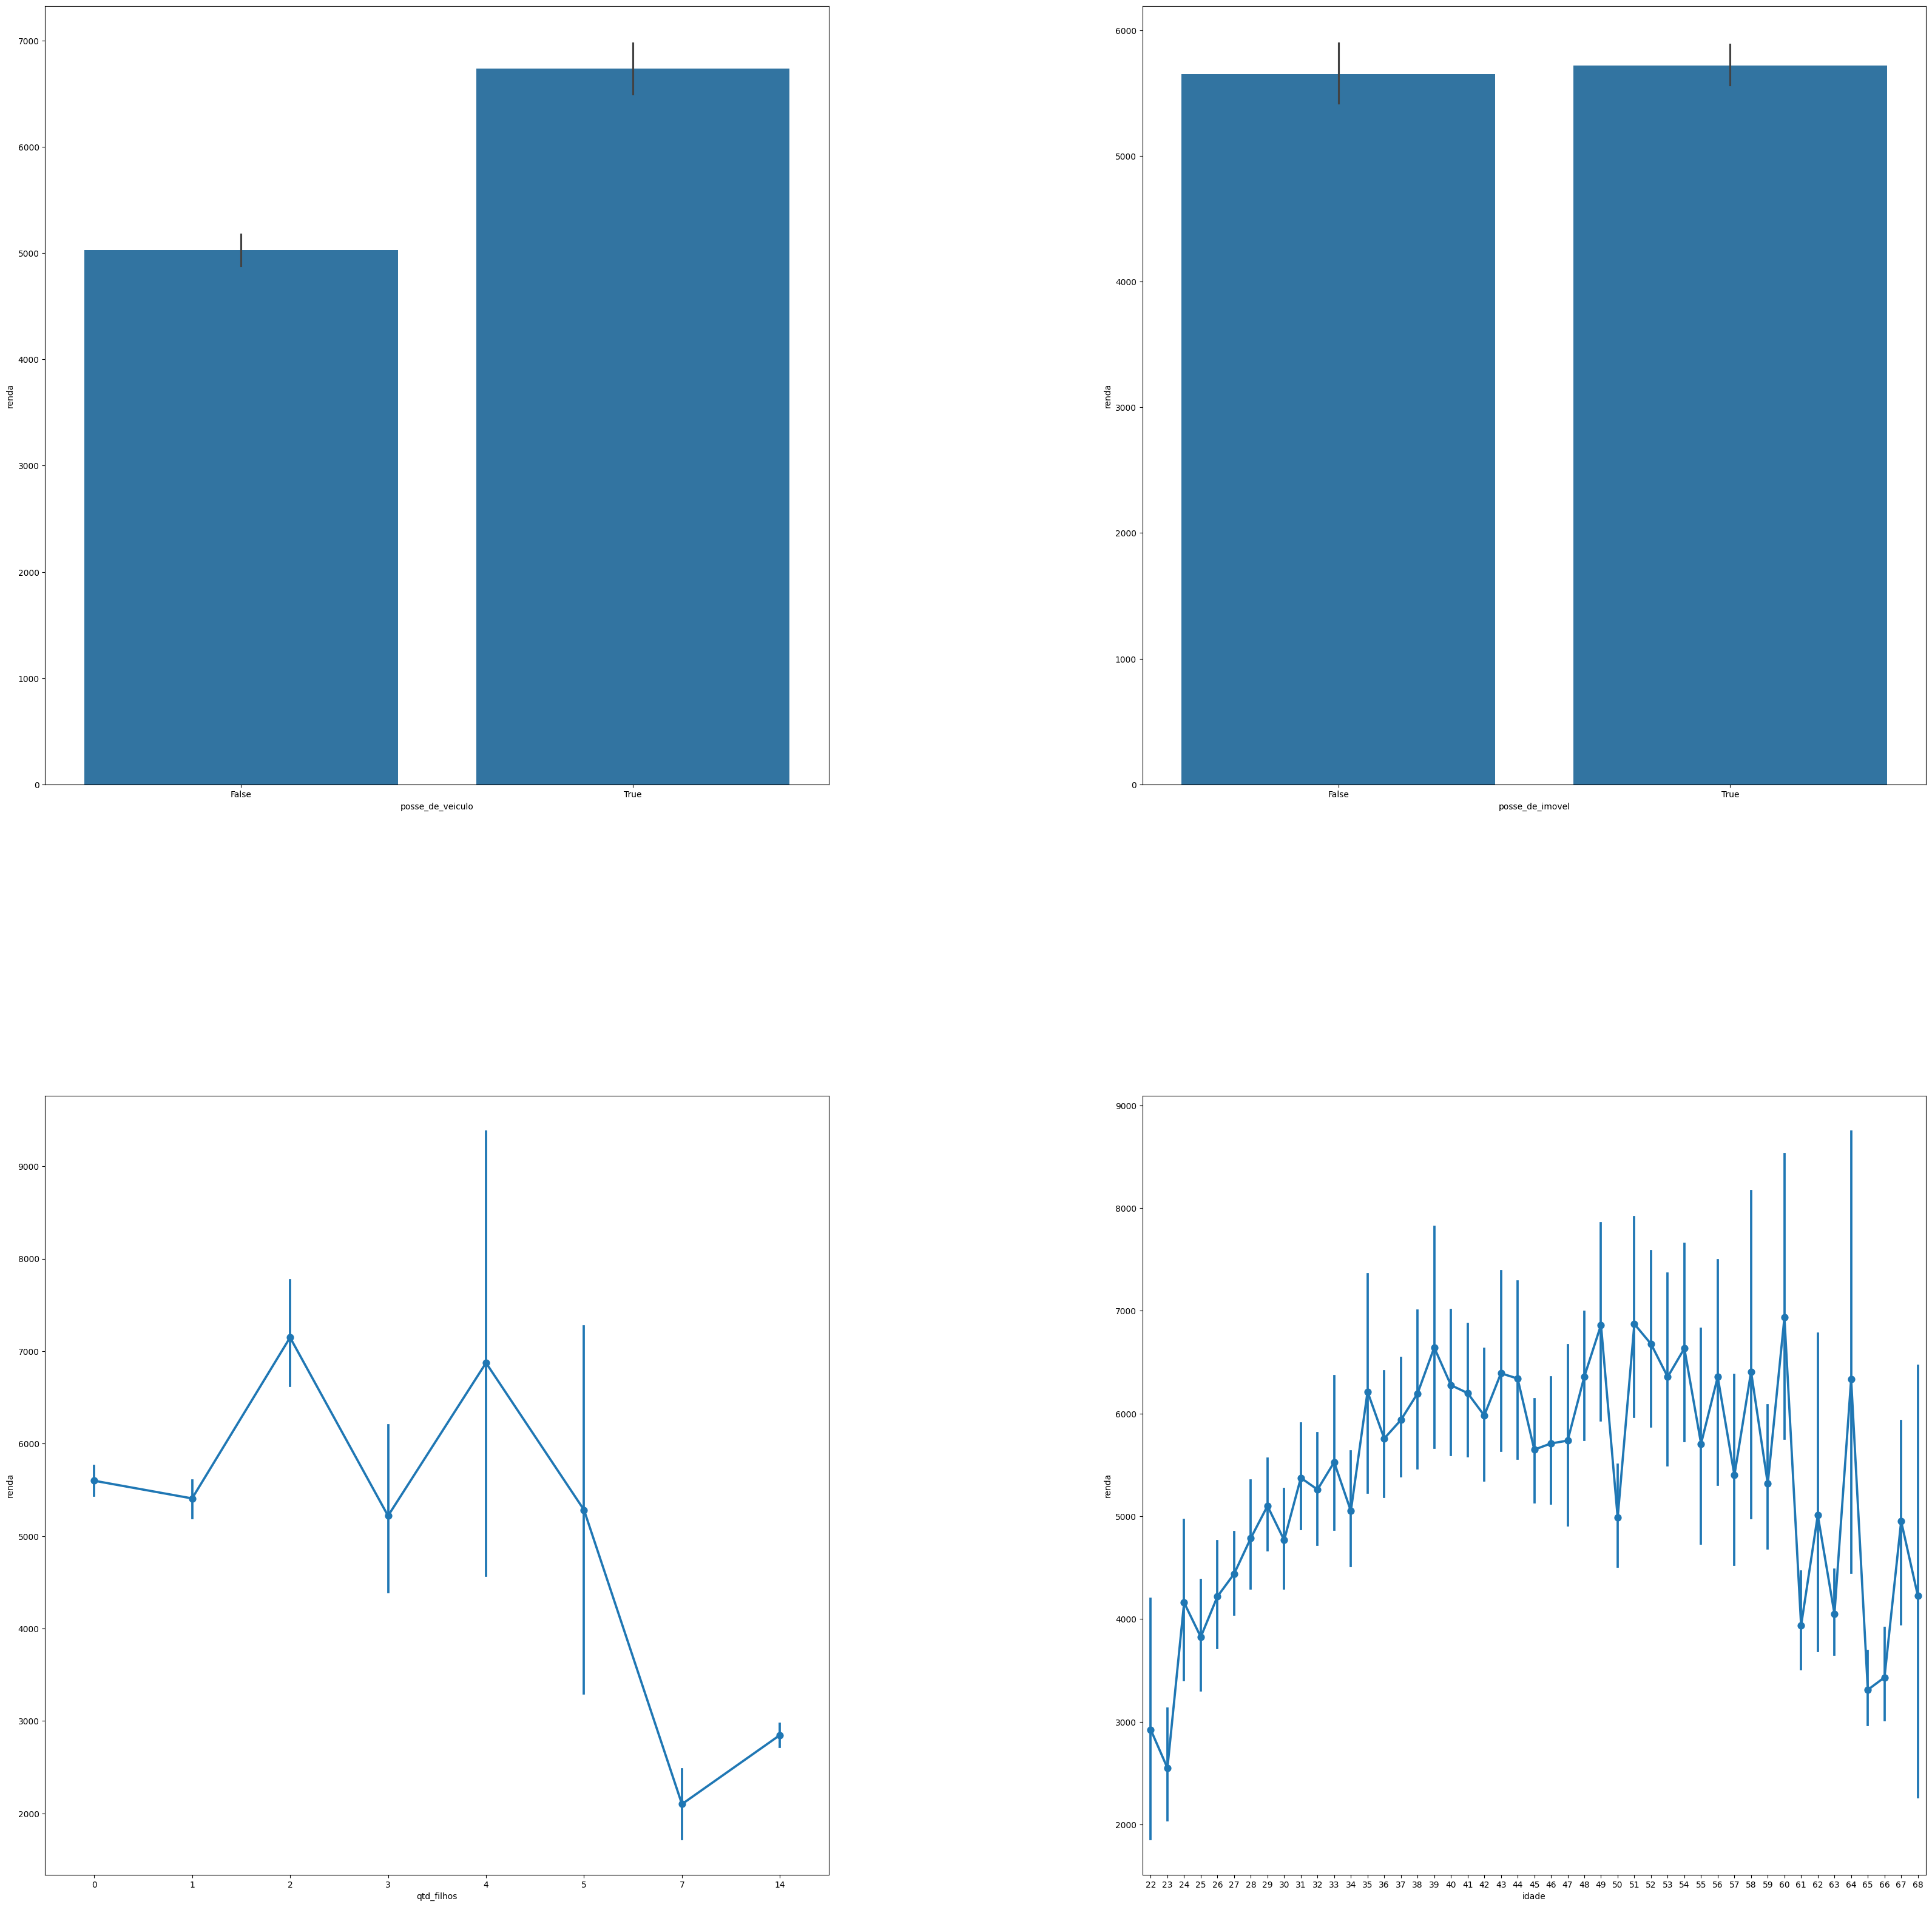

In [32]:
plt.close('all')

plt.rc('figure', figsize=(40, 40))
fig, axes = plt.subplots(2, 2)

sns.barplot(ax = axes[0, 0],y = 'renda', x = 'posse_de_veiculo', data = X)
sns.barplot(ax = axes[0, 1],y = 'renda', x = 'posse_de_imovel', data = X)
sns.pointplot(ax = axes[1, 0],y = 'renda', x = 'qtd_filhos', data = X)
sns.pointplot(ax = axes[1, 1],y = 'renda', x = 'idade', data = X)

plt.subplots_adjust(wspace=0.4, hspace=0.4)

In [33]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

def stepwise_selection(X, y, initial_list=[], threshold_in=0.05, threshold_out=0.05, verbose=True):
  """
  Perform a forward-backward feature selection based on p-value from statsmodels.api.OLS
  """
  included = list(initial_list)
  while True:
    changed = False
    # forward step
    excluded = list(set(X.columns) - set(included))
    new_pval = pd.Series(index=excluded, dtype=np.dtype('float64'))
    for new_column in excluded:
      model = sm.OLS(y, sm.add_constant(X[included + [new_column]])).fit()
      new_pval[new_column] = model.pvalues[new_column]
    best_pval = new_pval.min()
    if best_pval < threshold_in:
      best_feature = new_pval.idxmin()
      included.append(best_feature)
      changed = True
      if verbose:
        print('Add {:30} with p-value {:.6}'.format(best_feature, best_pval))

    # backward step
    if included:
      model = sm.OLS(y, sm.add_constant(X[included])).fit()
      # use all coefs except intercept
      pvalues = model.pvalues.iloc[1:]
      worst_pval = pvalues.max() # null if pvalues is empty
      if worst_pval > threshold_out:
        worst_feature = pvalues.idxmax()
        included.remove(worst_feature)
        changed = True
        if verbose:
          print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
    if not changed:
      break
  return included

In [34]:
X_train_a = X_train.dropna()

In [35]:
X_train_b = pd.get_dummies(X_train_a, columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)
X_train_b.head()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_M,posse_de_veiculo_True,posse_de_imovel_True,tipo_renda_Bolsista,tipo_renda_Empresário,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
1614,0,34,1.797260,2.0,3160.87,False,True,True,False,True,...,False,False,False,False,False,True,False,False,False,False
9327,1,34,9.101370,3.0,6480.13,True,True,True,False,True,...,False,False,False,False,False,True,False,False,False,False
11914,1,37,1.753425,3.0,5847.17,True,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
14579,1,44,7.473973,3.0,10415.23,True,True,True,False,False,...,False,False,False,False,False,True,False,False,False,False
10292,1,34,16.583562,3.0,10300.75,False,True,True,False,False,...,False,False,False,False,False,True,False,False,False,False


In [36]:
X_train_b = X_train_b.astype(float).dropna()

In [37]:
X_train_a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9327 entries, 1614 to 5640
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   9327 non-null   object 
 1   posse_de_veiculo       9327 non-null   bool   
 2   posse_de_imovel        9327 non-null   bool   
 3   qtd_filhos             9327 non-null   int64  
 4   tipo_renda             9327 non-null   object 
 5   educacao               9327 non-null   object 
 6   estado_civil           9327 non-null   object 
 7   tipo_residencia        9327 non-null   object 
 8   idade                  9327 non-null   int64  
 9   tempo_emprego          9327 non-null   float64
 10  qt_pessoas_residencia  9327 non-null   float64
 11  renda                  9327 non-null   float64
dtypes: bool(2), float64(3), int64(2), object(5)
memory usage: 819.8+ KB


In [38]:
X_train_b.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9327 entries, 1614 to 5640
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   qtd_filhos                     9327 non-null   float64
 1   idade                          9327 non-null   float64
 2   tempo_emprego                  9327 non-null   float64
 3   qt_pessoas_residencia          9327 non-null   float64
 4   renda                          9327 non-null   float64
 5   sexo_M                         9327 non-null   float64
 6   posse_de_veiculo_True          9327 non-null   float64
 7   posse_de_imovel_True           9327 non-null   float64
 8   tipo_renda_Bolsista            9327 non-null   float64
 9   tipo_renda_Empresário          9327 non-null   float64
 10  tipo_renda_Pensionista         9327 non-null   float64
 11  tipo_renda_Servidor público    9327 non-null   float64
 12  educacao_Pós graduação         9327 non-null   flo

In [39]:
X_train_c = X_train_b.drop(['renda'], axis=1)
y_train_a = X_train_b['renda']

In [40]:
result = stepwise_selection(X=X_train_c, y=y_train_a)
print('resulting features:')
print(result)

Add tempo_emprego                  with p-value 0.0
Add sexo_M                         with p-value 7.7764e-261
Add tipo_renda_Empresário          with p-value 0.000169345
Add idade                          with p-value 0.000475965
Add educacao_Superior completo     with p-value 0.000184571
Add qt_pessoas_residencia          with p-value 0.0124444
resulting features:
['tempo_emprego', 'sexo_M', 'tipo_renda_Empresário', 'idade', 'educacao_Superior completo', 'qt_pessoas_residencia']


In [41]:
X_train_b.rename(columns = {'educacao_Superior completo':'educacao_Superior_completo'}, inplace=True)

In [42]:
modelo_m = smf.ols('''np.log(renda) ~  tempo_emprego +
                                        sexo_M +
                                        tipo_renda_Empresário +
                                        idade +
                                        educacao_Superior_completo +
                                        qt_pessoas_residencia''', data = X_train_b).fit()
modelo_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     850.1
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:28:38   Log-Likelihood:                -10209.
No. Observations:                9327   AIC:                         2.043e+04
Df Residuals:                    9320   BIC:                         2.048e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      7.1511      0.045    157.244      0.000       7.062       7.240
tempo_emprego                  0.0628      0.001     52.346      0.000       0.060       0.065
sexo_M                         0.7922      0.016     49.900      0.000       0.761       0.823
tipo_renda_Empresário          0.1369      0.017      8.131      0.000       0.104       0.170
idade                          0.0049      0.001      5.551      0.000       0.003       0.007
educacao_Superior_completo     0.1107      0.016      7.122      0.000       0.080       0.141
qt_pessoas_residencia          0.0279      0.008      3.389      0.001       0.012       0.044
==============================================================================
Omnibus:                        0.010   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.995   Jarque-Bera (JB):                0.018
Skew:                           0.001   Prob(JB):                        0.991
Kurtosis:                       2.994   Cond. No.                         262.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
X_train_a = X_train.dropna()
X_train_b = pd.get_dummies(X_train_a, columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)
X_train_b.rename(columns = {'educacao_Superior completo':'educacao_Superior_completo'}, inplace=True)
X_train_b['log_renda']=np.log(X_train_b['renda'])

In [44]:
X_train_b = X_train_b.astype(float).dropna()

In [45]:
X_train_b['pred_m'] = modelo_m.predict(X_train_b)
r = X_train_b[['pred_m', 'log_renda']].corr().iloc[0,1]
r**2

0.35370080366987017

In [46]:
modelo_n = smf.ols('np.log(renda) ~  tempo_emprego + sexo_M + idade + qt_pessoas_residencia', data = X_train_b).fit()
modelo_n.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     1228.
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:29:29   Log-Likelihood:                -10271.
No. Observations:                9327   AIC:                         2.055e+04
Df Residuals:                    9322   BIC:                         2.059e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.2829      0.044    164.817      0.000       7.196       7.370
tempo_emprego             0.0621      0.001     51.642      0.000       0.060       0.064
sexo_M                    0.7827      0.016     49.054      0.000       0.751       0.814
idade                     0.0041      0.001      4.625      0.000       0.002       0.006
qt_pessoas_residencia     0.0236      0.008      2.853      0.004       0.007       0.040
==============================================================================
Omnibus:                        0.048   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.977   Jarque-Bera (JB):                0.062
Skew:                           0.003   Prob(JB):                        0.970
Kurtosis:                       2.989   Cond. No.                         252.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
modelo_o = smf.ols('np.log(renda) ~  tempo_emprego + I(tempo_emprego**2) + sexo_M + idade + qt_pessoas_residencia', data = X_train_b).fit()
modelo_o.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     996.7
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:29:51   Log-Likelihood:                -10248.
No. Observations:                9327   AIC:                         2.051e+04
Df Residuals:                    9321   BIC:                         2.055e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.2092      0.045    158.925      0.000       7.120       7.298
tempo_emprego             0.0810      0.003     27.017      0.000       0.075       0.087
I(tempo_emprego ** 2)    -0.0007      0.000     -6.876      0.000      -0.001      -0.001
sexo_M                    0.7827      0.016     49.171      0.000       0.751       0.814
idade                     0.0043      0.001      4.938      0.000       0.003       0.006
qt_pessoas_residencia     0.0199      0.008      2.408      0.016       0.004       0.036
==============================================================================
Omnibus:                        0.400   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.819   Jarque-Bera (JB):                0.429
Skew:                           0.012   Prob(JB):                        0.807
Kurtosis:                       2.976   Cond. No.                     1.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
regr1 = DecisionTreeRegressor(max_depth=8)
regr2 = DecisionTreeRegressor(max_depth=2)

regr1.fit(X_train_c, y_train_a)
regr2.fit(X_train_c, y_train_a)

DecisionTreeRegressor(max_depth=2)

In [49]:
train1 = regr1.predict(X_train_c)
train2 = regr2.predict(X_train_c)
print('Para base de treinamento:')
print('O mse com profundidade = 8, MSE=', mean_squared_error(y_train_a,train1))
print('O mse com profundidade = 2, MSE=', mean_squared_error(y_train_a,train2))

Para base de treinamento:
O mse com profundidade = 8, MSE= 27828883.890118647
O mse com profundidade = 2, MSE= 57912531.139818706


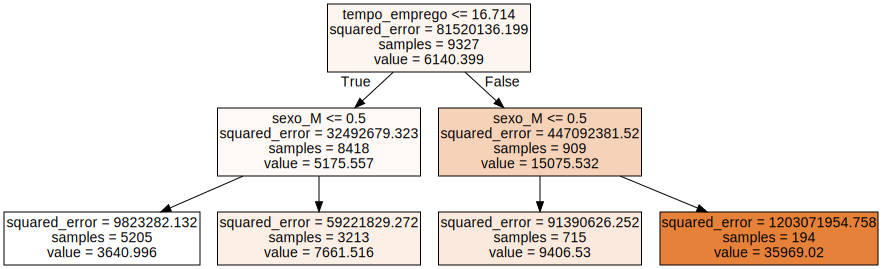

In [50]:
data = tree.export_graphviz(regr2, out_file=None,
                                feature_names=X_train_c.columns,
                                filled=True)

graph = graphviz.Source(data, format="png")
graph

In [51]:
path = regr1.cost_complexity_pruning_path(X_train_c, y_train_a)

Text(0, 0.5, 'Impureza total das folhas')

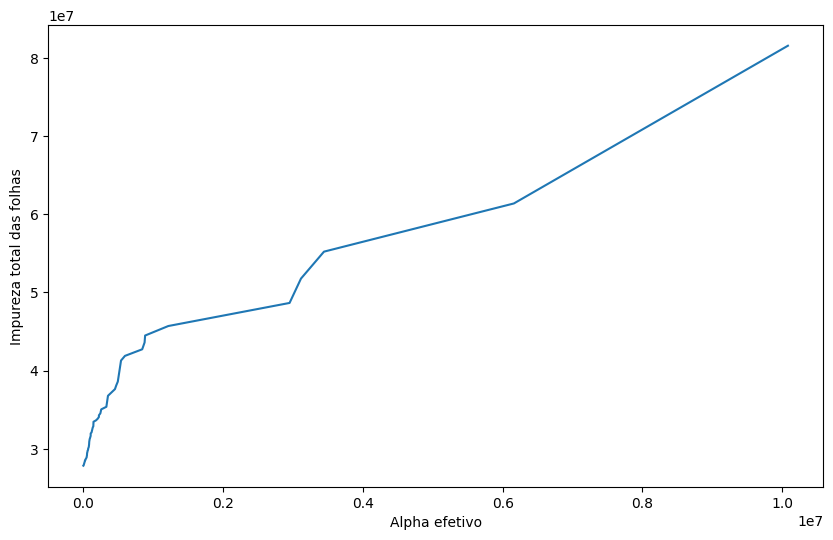

In [52]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

In [53]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_c, y_train_a)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

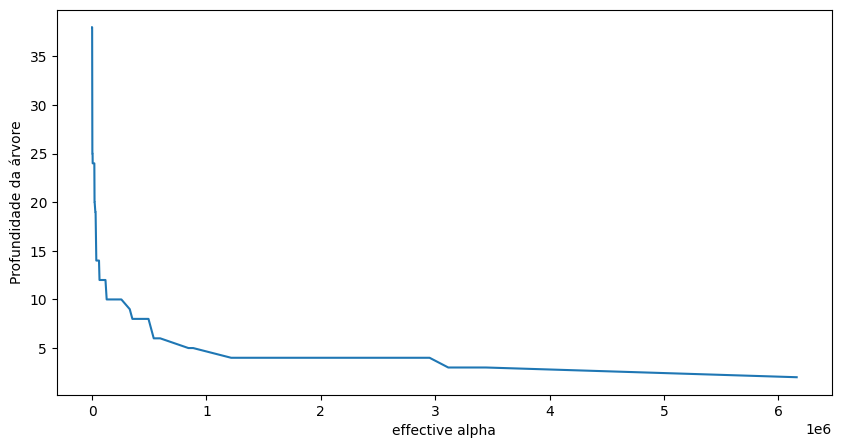

In [54]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  5))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

In [55]:
train_scores = [mean_squared_error(y_train_a, clf.predict(X_train_c)) for clf in clfs]

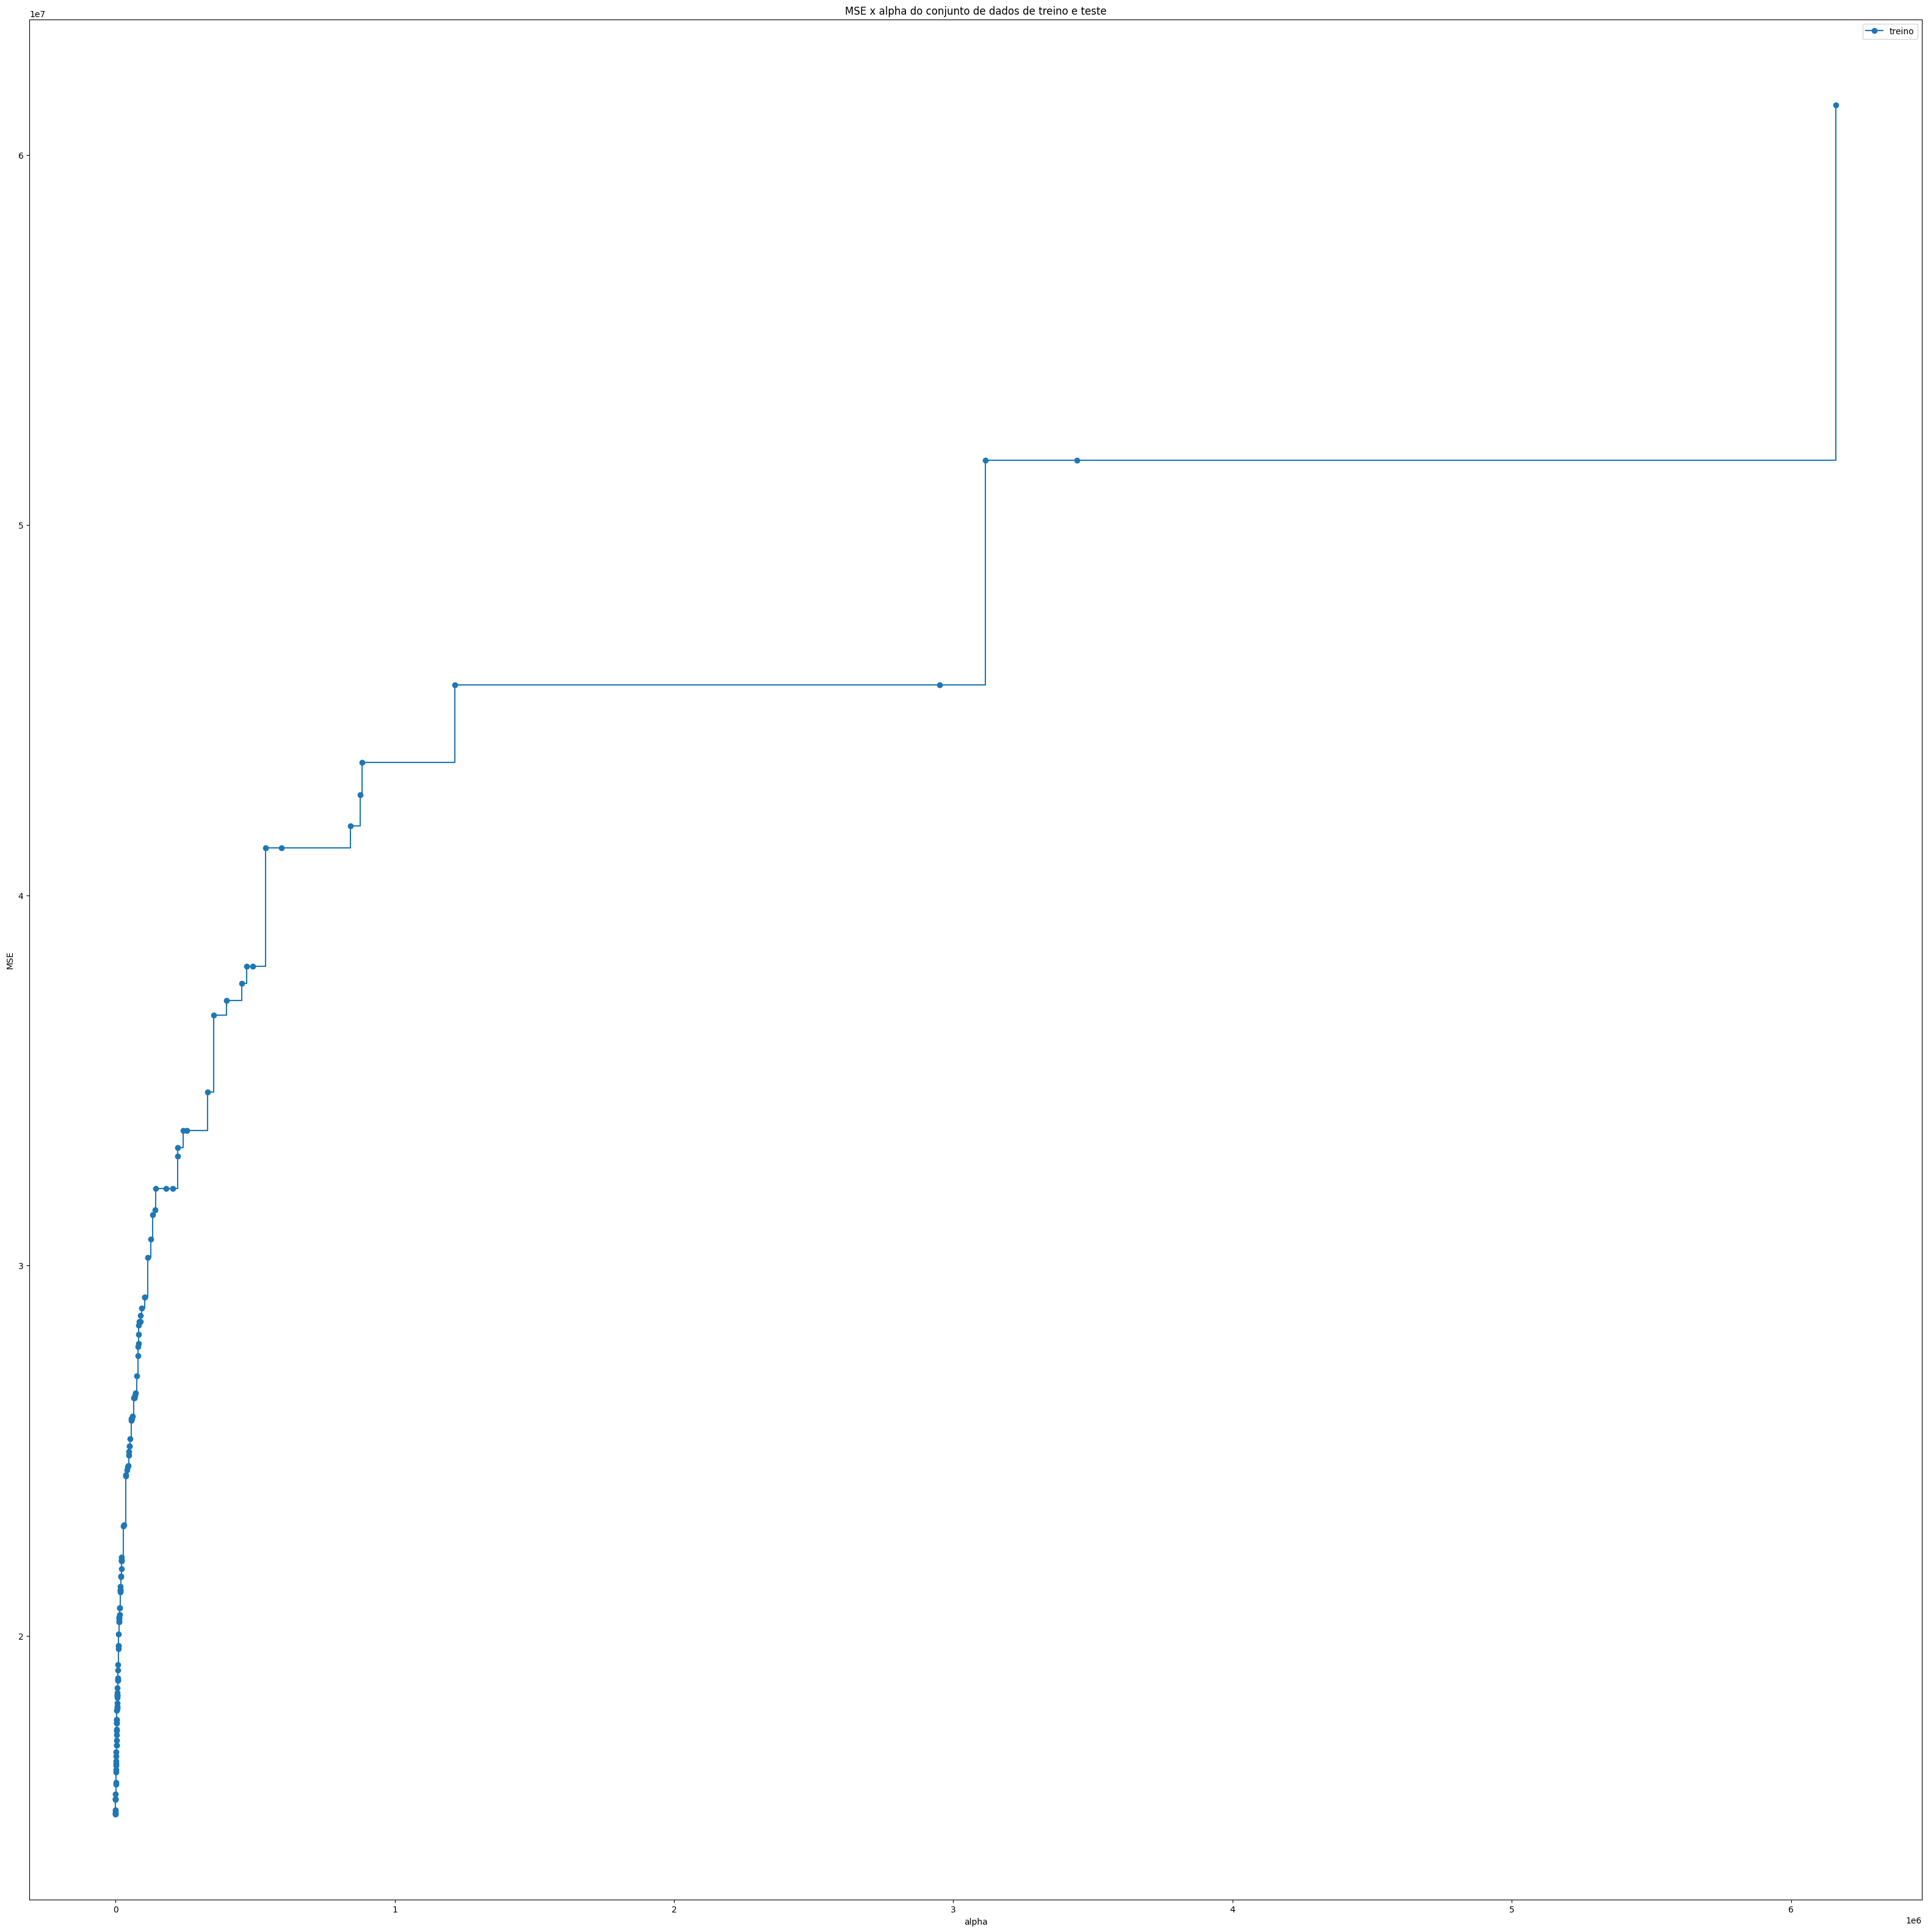

In [56]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [57]:
arvore_final = DecisionTreeRegressor (random_state=0, ccp_alpha=.5)
arvore_final.fit(X_train_c, y_train_a)

print(f'Profundidade: {arvore_final.tree_.max_depth}')
print(f'MSE na base de testes: {mean_squared_error(y_train_a , arvore_final.predict(X_train_c)):.2f}')

Profundidade: 38
MSE na base de testes: 15184218.76


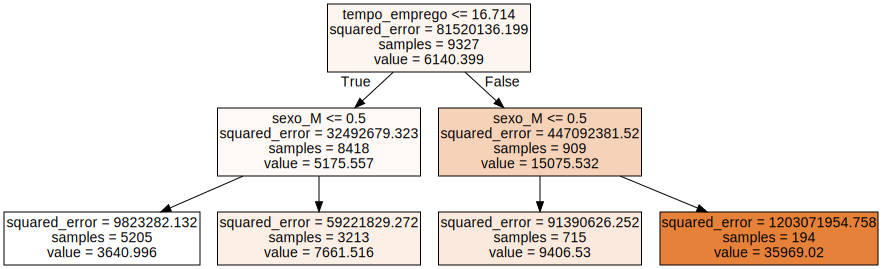

In [58]:
ata = tree.export_graphviz(regr1, out_file=None,
                                feature_names=X_train_c.columns,
                                filled=True)

graph = graphviz.Source(data, format="png")
graph